In [37]:
import brainsurf.data.csv as csv_import
file_path = 'brainsurf/data/samples/adarsh/adarsh_pre_med.csv'
adarsh_pre_med = csv_import.convert_csv_to_eegdata(file_path)
data_summary = adarsh_pre_med.summary(300)

       sec        raw
0    0.000 -16.534400
1    0.005 -23.730500
2    0.010 -24.639900
3    0.015 -22.241200
4    0.020 -19.952400
..     ...        ...
295  1.475  -0.976563
296  1.480  -4.052730
297  1.485  -3.845210
298  1.490  -1.745610
299  1.495   3.674320

[300 rows x 2 columns]


In [38]:
adarsh_pre_cog = csv_import.convert_csv_to_eegdata('brainsurf/data/samples/adarsh/adarsh_pre_cog.csv')
adarsh_med = csv_import.convert_csv_to_eegdata('brainsurf/data/samples/adarsh/adarsh_med.csv')
adarsh_post_med = csv_import.convert_csv_to_eegdata('brainsurf/data/samples/adarsh/adarsh_post_cog.csv')
adarsh_post_cog = csv_import.convert_csv_to_eegdata('brainsurf/data/samples/adarsh/adarsh_post_cog.csv')

In [39]:
adarsh_pre_cog = csv_import.convert_csv_to_eegdata('brainsurf/data/samples/adarsh/adarsh_pre_cog.csv')
adarsh_med = csv_import.convert_csv_to_eegdata('brainsurf/data/samples/adarsh/adarsh_med.csv')
adarsh_post_med = csv_import.convert_csv_to_eegdata('brainsurf/data/samples/adarsh/adarsh_post_cog.csv')
adarsh_post_cog = csv_import.convert_csv_to_eegdata('brainsurf/data/samples/adarsh/adarsh_post_cog.csv')

In [40]:
adarsh_pre_cog = csv_import.convert_csv_to_eegdata('brainsurf/data/samples/adarsh/adarsh_pre_cog.csv')
adarsh_med = csv_import.convert_csv_to_eegdata('brainsurf/data/samples/adarsh/adarsh_med.csv')
adarsh_post_med = csv_import.convert_csv_to_eegdata('brainsurf/data/samples/adarsh/adarsh_post_cog.csv')
adarsh_post_cog = csv_import.convert_csv_to_eegdata('brainsurf/data/samples/adarsh/adarsh_post_cog.csv')

In [41]:
summary = adarsh_pre_med.summary(10)

     sec      raw
0  0.000 -16.5344
1  0.005 -23.7305
2  0.010 -24.6399
3  0.015 -22.2412
4  0.020 -19.9524
5  0.025 -18.4143
6  0.030 -20.9778
7  0.035 -20.2393
8  0.040 -21.4050
9  0.045 -21.0022


In [42]:
adarsh_pre_med.extract_frequency_bands()
adarsh_pre_cog.extract_frequency_bands()
adarsh_med.extract_frequency_bands()
adarsh_post_med.extract_frequency_bands()
adarsh_post_cog.extract_frequency_bands()

In [43]:
summary = adarsh_pre_med.summary(10)

     sec      raw     alpha      beta       delta     theta     gamma
0  0.000 -16.5344  0.739153  0.340532   49.747628  4.116308  0.040695
1  0.005 -23.7305  1.676459  0.749908   42.575573  3.634073  0.038842
2  0.010 -24.6399  3.382342  2.419534  135.210048  3.892357  0.125695
3  0.015 -22.2412  1.434365  1.619343   84.618161  3.953389  0.087822
4  0.020 -19.9524  4.340995  6.558143   78.591010  5.409474  0.729613
5  0.025 -18.4143  0.908967  0.688162   34.664515  1.957621  0.036741
6  0.030 -20.9778  1.791933  1.296061   83.958023  3.180223  0.098377
7  0.035 -20.2393  1.976249  1.150905   34.516828  2.102519  0.058791
8  0.040 -21.4050  0.469199  0.218817   29.096778  1.206942  0.010982
9  0.045 -21.0022  0.614998  0.385991   70.191149  3.794692  0.018610


In [44]:
import numpy as np
import brainsurf.utils.data as util
values = np.asarray(adarsh_pre_cog['sec'], dtype=object)
sampling_freq = util.estimate_sampling_frequency(values)
print(sampling_freq)

200.00000000000003


In [45]:
lowcut = 0.5 # Hz
highcut = 50 # Hz
order = 4
freqs = [0, 50] # Hz
q = 30

In [46]:
import brainsurf.visualization.plot_eeg_signal as plt
import brainsurf.preprocessing.filtering as filter

bandpass_filtered_pre_med_eeg = filter.butter_bandpass_filter(adarsh_pre_med['raw'], lowcut, highcut, sampling_freq, order) 
bandpass_filtered_pre_cog_eeg = filter.butter_bandpass_filter(adarsh_pre_cog['raw'], lowcut, highcut, sampling_freq, order) 
bandpass_filtered_med_eeg = filter.butter_bandpass_filter(adarsh_med['raw'], lowcut, highcut, sampling_freq, order) 
bandpass_filtered_post_med_eeg = filter.butter_bandpass_filter(adarsh_post_med['raw'], lowcut, highcut, sampling_freq, order) 
bandpass_filtered_post_cog_eeg = filter.butter_bandpass_filter(adarsh_post_med['raw'], lowcut, highcut, sampling_freq, order) 


In [47]:
print(bandpass_filtered_med_eeg)

[  0.93205546   4.40512426   7.97716605 ... -11.25110498  -7.36394382
  -1.08834331]


In [48]:
adarsh_pre_cog.dropna()
adarsh_post_cog.dropna()

# Comparitive Analysis

In [49]:
# adarsh_pre_med
# adarsh_pre_cog
# adarsh_med
# adarsh_post_med
# adarsh_post_cog
pre_sec = adarsh_pre_cog['sec']
pre_raw = adarsh_pre_cog['raw']
pre_alpha = adarsh_pre_cog['alpha']
pre_beta = adarsh_pre_cog['beta']
pre_delta = adarsh_pre_cog['delta']
pre_theta = adarsh_pre_cog['theta']
pre_gamma = adarsh_pre_cog['gamma']

during_sec = adarsh_med['sec']
during_raw = adarsh_med['raw']
during_alpha = adarsh_med['alpha']
during_beta = adarsh_med['beta']
during_delta = adarsh_med['delta']
during_theta = adarsh_med['theta']
during_gamma = adarsh_med['gamma']

post_sec = adarsh_post_cog['sec']
post_raw = adarsh_post_cog['raw']
post_alpha = adarsh_post_cog['alpha']
post_beta = adarsh_post_cog['beta']
post_delta = adarsh_post_cog['delta']
post_theta = adarsh_post_cog['theta']
post_gamma = adarsh_post_cog['gamma']


In [50]:
fs = 250  # Assuming the sampling frequency is 250 Hz

scales = np.arange(1, 10)  # An example range of scales for fractal dimension calculation

In [51]:
import brainsurf.data.comparative_visualize as compare
factory = compare.ComparativeVisualizationFactory()

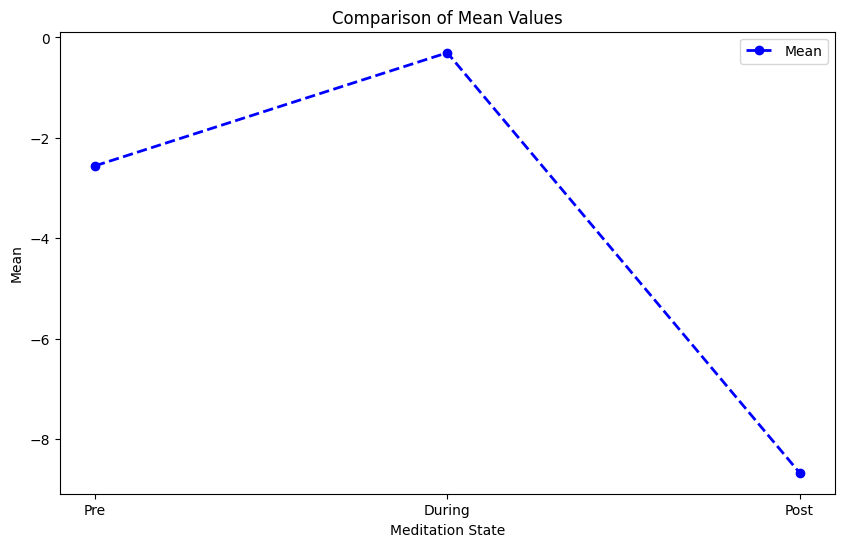

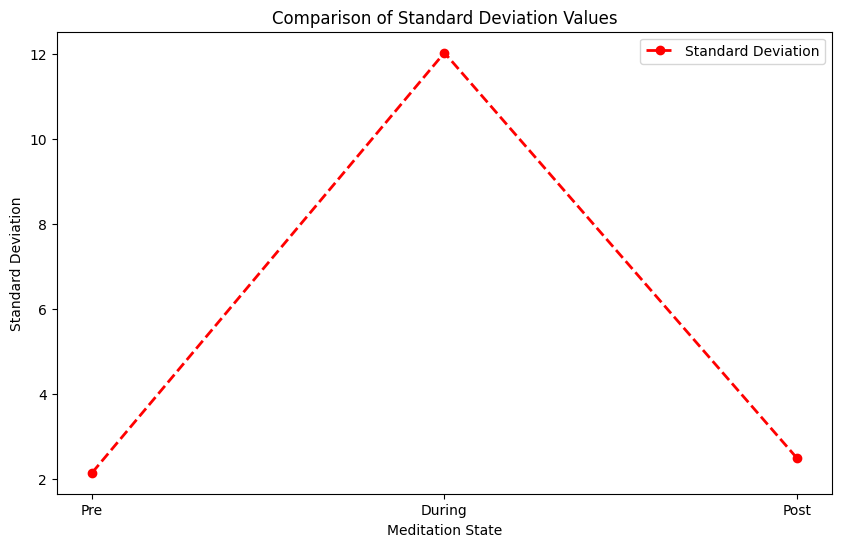

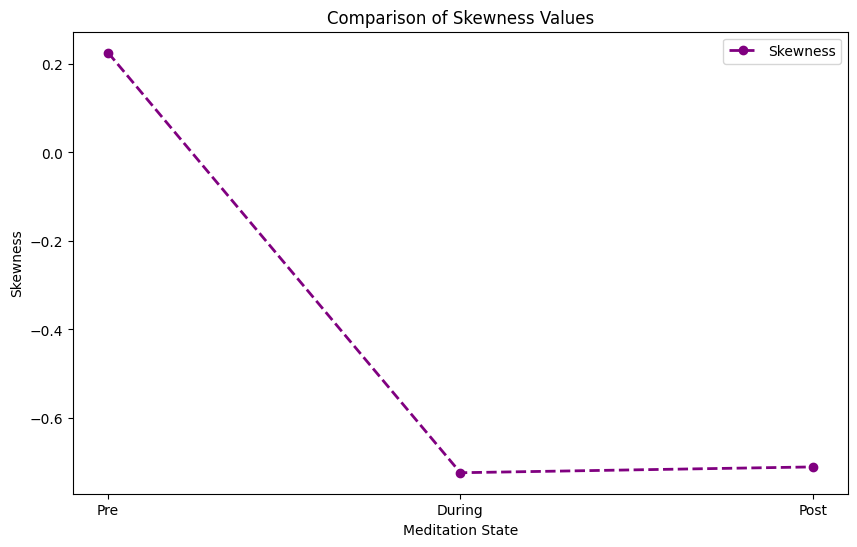

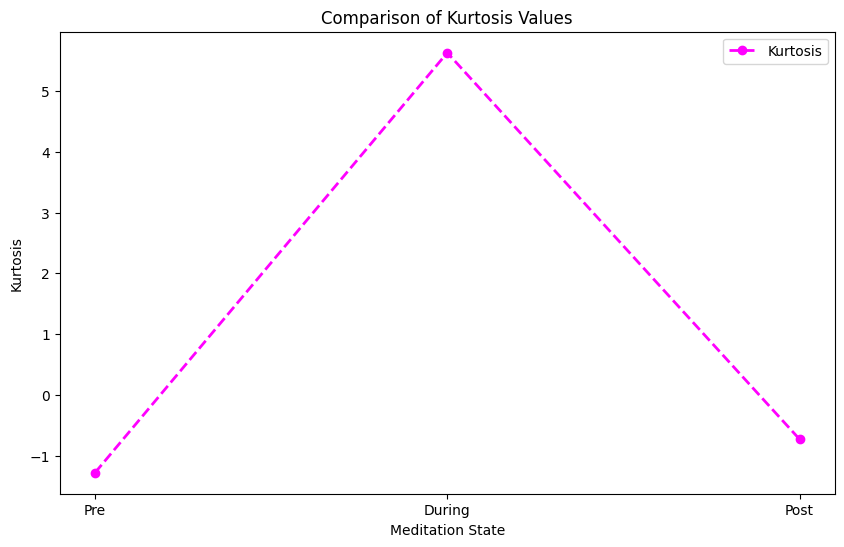

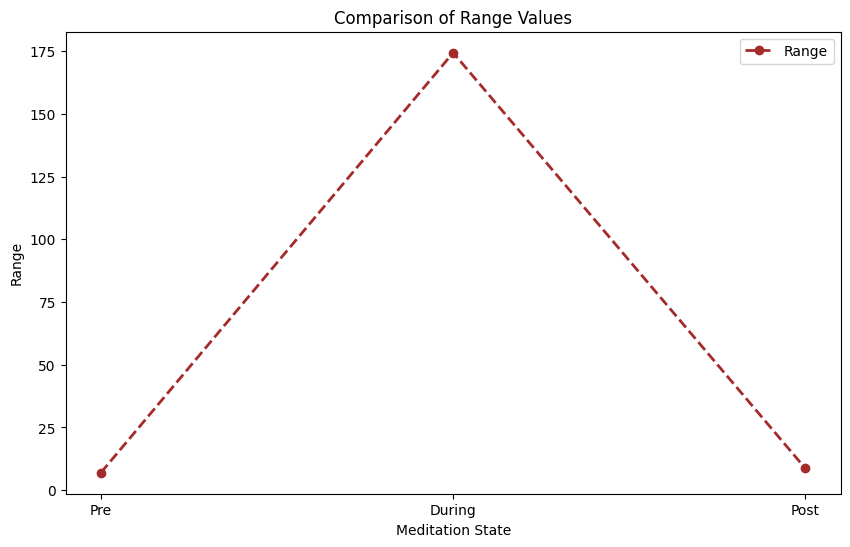

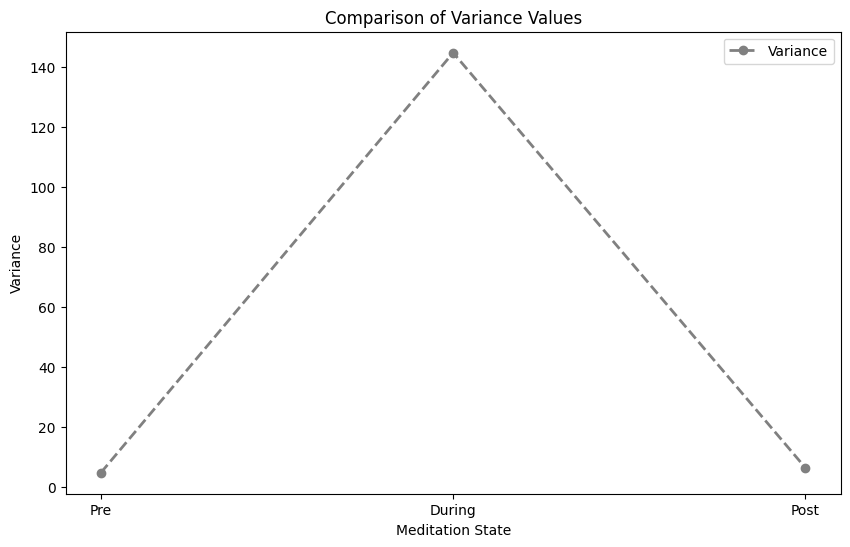

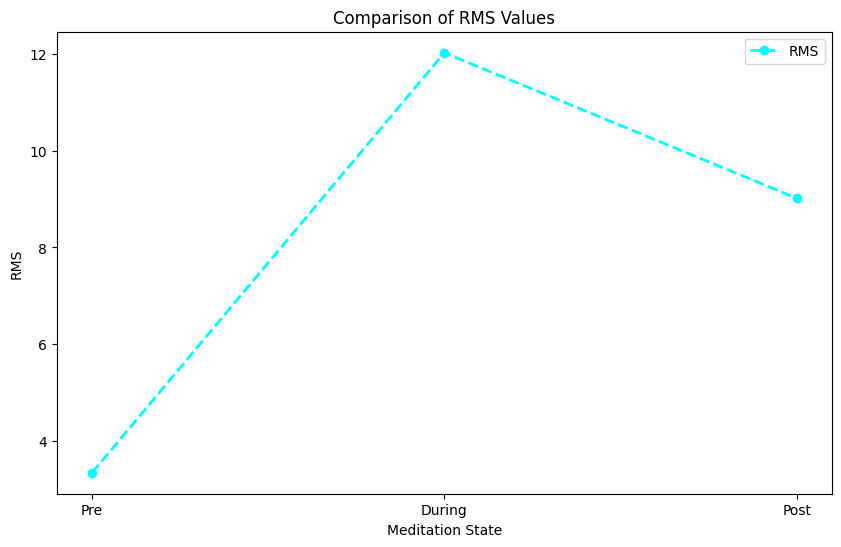

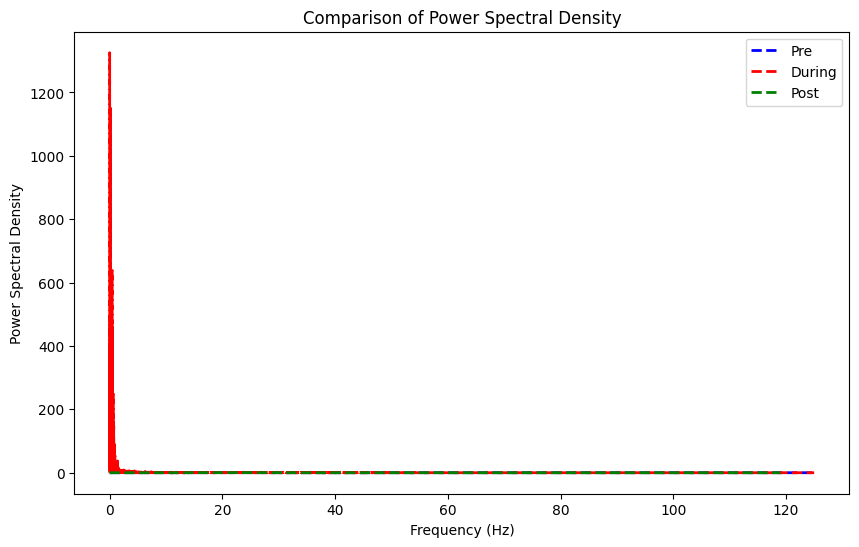

AttributeError: 'ComparativeVisualizationFactory' object has no attribute 'visualize_mean_spec'

In [52]:

# Visualize statistical features
factory.visualize_mean(pre_raw, during_raw, post_raw)
factory.visualize_standard_deviation(pre_raw, during_raw, post_raw)

# Calculate and visualize other features
factory.visualize_skewness(pre_raw, during_raw, post_raw)
factory.visualize_kurtosis(pre_raw, during_raw, post_raw)
factory.visualize_range(pre_raw, during_raw, post_raw)
factory.visualize_variance(pre_raw, during_raw, post_raw)
factory.visualize_rms(pre_raw, during_raw, post_raw)
factory.visualize_spectral_power(pre_raw, during_raw, post_raw, fs)  # Replace 'fs' with the actual sampling frequency
# factory.visualize_coherence(pre_raw, during_raw, fs)  # Replace 'fs' with the actual sampling frequency
# factory.visualize_fractal_dimension(pre_raw, scales)
factory.visualize_mean_spec(pre_raw, during_raw, post_raw)


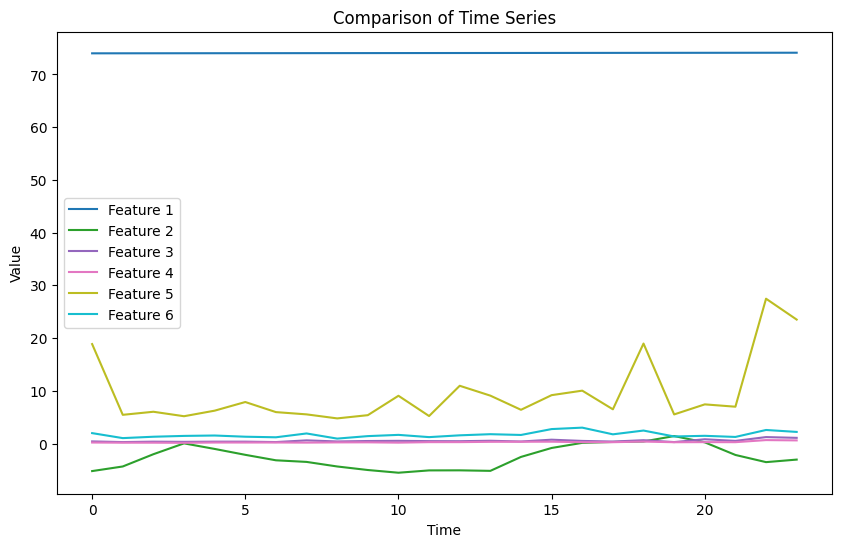

In [ ]:

# Call the visualization function with three persons
factory.visualize_multi_feature_time_series(6, pre_sec, pre_raw, pre_alpha, pre_beta, pre_delta, pre_theta )


In [ ]:
# # change the location of function
# import brainsurf.cognitive_analysis_module.cognitive_comparision as cognitiveComp

# cognitive_stats = cognitiveComp.analyze_eeg_data(pre_merged_df,post_merged_df)
# cognitive_stats

# Cognitive Analysis

In [ ]:
adarsh_pre_cog.dropna()
adarsh_post_cog.dropna()
adarsh_pre_cog.summary(5)

      sec       raw     alpha      beta      delta     theta     gamma
0  74.000 -5.224610  0.402189  0.190739  18.862726  1.974057  0.007472
1  74.005 -4.351810  0.275272  0.158867   5.444490  1.028094  0.005800
2  74.010 -2.026370  0.354565  0.159501   6.025449  1.288724  0.005955
3  74.015  0.030518  0.320697  0.134610   5.178307  1.446696  0.007705
4  74.020 -1.025390  0.355913  0.190410   6.233101  1.520567  0.008599


In [ ]:
import brainsurf.cognitive_analysis_module.cognitive_comparision as cognitiveComp

cog_idx_before, cog_idx_after= cognitiveComp.calculate_cognitive_indexes(pre_merged_df, post_merged_df)
test_statistic, p_value = cognitiveComp.compare_cognitive_indexes(cog_idx_before, cog_idx_after)

NameError: name 'pre_merged_df' is not defined

In [ ]:
# Print the test statistic and p-value
print("Test Statistic:", test_statistic)
print("P-value:", p_value)

In [ ]:
import pandas as pd
# Create a dictionary with column names and data
data = {
    'Performance Eval Before': cog_idx_before[0],
    'Arousal Index Before': cog_idx_before[1],
    'Neural Activity Before': cog_idx_before[2],
    'Engagement Before': cog_idx_before[3],
    'Performance Eval After': cog_idx_after[0],
    'Arousal Index After': cog_idx_after[1],
    'Neural Activity After': cog_idx_after[2],
    'Engagement After': cog_idx_after[3]
}

df = pd.DataFrame(data)
df

From the analysis of the EEG data, we can infer the following:

1. EEG: There is a significant difference between the pre-merged and post-merged groups, as indicated by the high t-statistic (8.139738) and low p-value (5.115667e-10). The effect size (2.634322) suggests a large difference between the groups.

2. Alpha: The t-statistic (-0.507390) and p-value (0.6146674) indicate no significant difference between the pre-merged and post-merged groups. The effect size (0.136628) suggests a small difference between the groups.

3. Beta: There is a significant difference between the pre-merged and post-merged groups, as indicated by the high t-statistic (-8.657478) and low p-value (1.038907e-10). The effect size (4.046542) suggests a large difference between the groups.

4. Theta: The t-statistic (1.770214) and p-value (0.08431342) indicate no significant difference between the pre-merged and post-merged groups. The effect size (0.789284) suggests a moderate difference between the groups.

5. Delta: The t-statistic (-0.141509) and p-value (0.8881781) indicate no significant difference between the pre-merged and post-merged groups. The effect size (0.115006) suggests a small difference between the groups.

Based on these results, we can conclude that the changes in the EEG and Beta waves are statistically significant, indicating a significant difference between the pre-merged and post-merged groups. However, there are no significant differences in the Alpha, Theta, and Delta waves between the two groups.

# Stroop Test Analysis

In [ ]:
file_path = 'brainsurf/data/samples/stroop.csv'
stroop_adarsh_pre = pd.read_csv(file_path)
stroop_adarsh_pre

In [ ]:
cognitiveComp.analyze_stroop_data(stroop_adarsh_pre)

Response Time Analysis:

The average response time for congruent trials (where Color 1 and Color 2 are congruent) is 9.18 units.
The average response time for incongruent trials (where Color 1 and Color 2 are incongruent) is 8.59 units.
The t-value is 0.35, indicating a small difference between the average response times of congruent and incongruent trials.
The p-value is 1.9355, which is not statistically significant. This suggests that the difference in response times between congruent and incongruent trials may have occurred by chance.
Accuracy Analysis:

The average accuracy for congruent trials is 236.36%.
The average accuracy for incongruent trials is 231.03%.
The t-value is 0.13, indicating a small difference between the average accuracies of congruent and incongruent trials.
The p-value is 1.9726, which is not statistically significant. This implies that the difference in accuracies between congruent and incongruent trials may have occurred by chance.

In [ ]:
file_path = 'brainsurf/data/samples/adarsh_stroop_post.csv'
stroop_adarsh_post = pd.read_csv(file_path)
stroop_adarsh_post

In [ ]:
cognitiveComp.analyze_stroop_data(stroop_adarsh_post)

Based on the provided information, it seems that the response times and accuracy did not show significant differences before and after meditation, as indicated by the p-values being greater than the typical significance level of 0.05.

